In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import renders as rs

%matplotlib inline

SEED = 42

In [2]:
iris = sns.load_dataset("iris")
measures = iris.select_dtypes(include=['float'])
preds = KMeans(n_clusters=3, random_state=SEED).fit_predict(measures)
preds_series = pd.Series(preds, index=iris.index, name='Clust')
print silhouette_score(measures, preds)

0.552819012356


In [3]:
N_DIMS = 4
pca = PCA(n_components=N_DIMS).fit(measures)
dim_cols = [' '.join(['Dim', str(i)]) for i in range(N_DIMS)]
pca_df = pd.DataFrame(pca.transform(measures),
                      index=measures.index,
                      columns=dim_cols)

species_map = {'setosa': 1, 'versicolor': 0, 'virginica': 2}
species = iris.species.replace(species_map)
inaccurate = (species!=preds).rename('inaccurate')

df_comb = pd.concat([pca_df, measures, species, 
                     preds_series, inaccurate], axis=1)

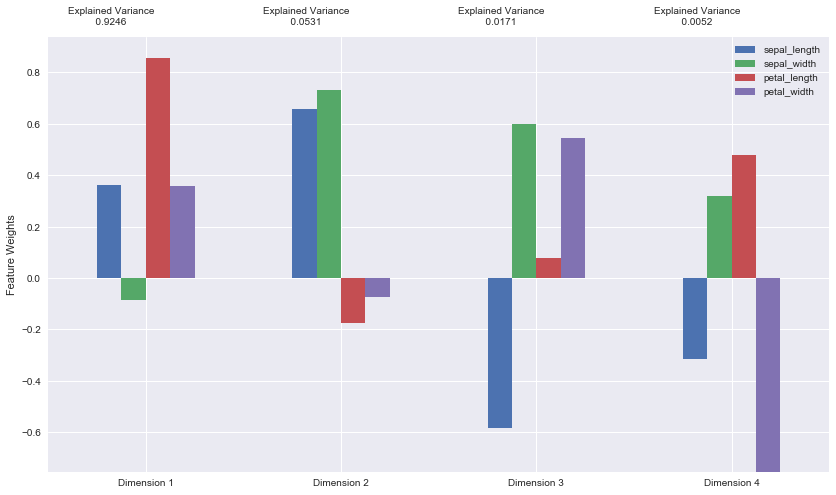

In [4]:
pca_results = rs.pca_results(measures, pca)

In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix(species, preds_series)

array([[48,  0,  2],
       [ 0, 50,  0],
       [14,  0, 36]])

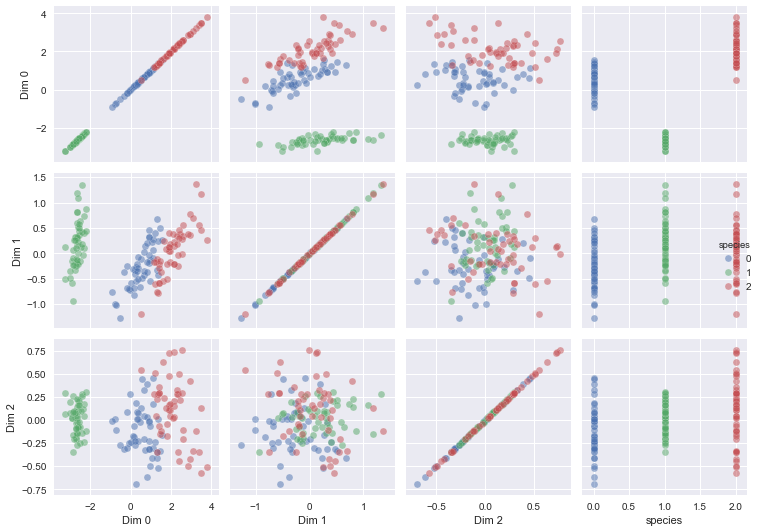

In [7]:
meas_cols = measures.columns.tolist()

hue_col = 'species'
y_vars = dim_cols[:3]
x_vars = dim_cols[:3]+[hue_col]
sns.pairplot(x_vars=x_vars, y_vars=y_vars, hue=hue_col, data=df_comb, 
             plot_kws=dict(alpha=.5))

plt.tight_layout()